# Let us get the basics done.  Import the relevant libraries


In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [338]:
pd.set_option('display.max_rows', None)

In [397]:
# Now read the data set
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [270]:
loan_df.shape


(39717, 111)

In [252]:
# Are there columns that have only one value? Such columns cannot really provide much value
cardinality = loan_df.nunique(axis=0)
print(cardinality)

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [253]:
columns_with_cardinality_1 = cardinality[cardinality == 1].index
print(columns_with_cardinality_1)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


### Columns with one values

You can see that there are a bunch of columns with only one values.  These columns are not of much use.

In [398]:
loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)

In [341]:
loan_df.shape


(39717, 102)

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Just a perusal of the data in these 5 rows, we see that there are a lot of columns with NaN values or null values.
> Let us get some data about how many values are null

In [23]:
loan_df.isnull().sum()


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0


### There are so many columns with null values
> Some of the columns are total_bal_il, tot_cur_bal, annual_inc_joint, mths_since_last_major_derog

In [399]:
# Let us remove them
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [274]:
loan_df.shape

(39717, 48)

In [275]:
# What values does the loan status column have?

value_counts = loan_df['loan_status'].value_counts()
print(value_counts)


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [400]:
# Loans that are 'current' i.e. that are still in the repayment window cannot be considered.  Let us discard them.
loan_df = loan_df[loan_df.loan_status != 'Current']

In [285]:
loan_df.shape

(39717, 44)

In [401]:
# desc is a column that does not give any value.  
loan_df.drop(['desc'], axis = 1, inplace = True)

# Similarly, next_paymnt_d and mths_since_last_delinq cannot be used to give any insights.  
# mths_since_last_record just shows how long someone has gone without any public records.  So this is not of any use to us.
# Removing these two.

loan_df.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis = 1, inplace = True)


# Added from Ajay's Notebook
loan_df.drop(["member_id", "url", "last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt_inv", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)






In [355]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [357]:
loan_df['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

In [377]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'amount_bins', 'annual_income_groups',
       'issue_year', 'issue_month', 'earliest_cr_year', 'earliest_cr_month'],
      dtype='object')

In [277]:

loan_df.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### Clean values with symbols

In [402]:
#stripping '%' value
loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)
loan_df['revol_util'] = loan_df.revol_util.str.strip('%').astype(float)

In [404]:
# Clean the employee length param
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')

In [286]:
loan_df.shape

(39717, 44)

## Change the format of dates

In [405]:
# Added from Ajay's Notebook

# Columns "issue_d" and "earliest_cr_line" have to be converted to date datatype

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')


# Extract year and month into new columns
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['earliest_cr_month'] = loan_df['earliest_cr_line'].dt.month

In [360]:
loan_df.shape

(38577, 50)

## Create some derived attributes

In [406]:
# Since the max loan amount is 35k, let us use 7 bins of 5k each 
loan_df['amount_bins'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['>0-5k','>5k-10k','>10k-15k','>15k-20k','>20k-25k','>25k-30k','>30k-35k'])

### Income groups can be created to bucket the annual income of borrowwers.
__Creating 7 income groups - 0-50K, 50K-100K, 100K-150K, 150K - 200K, 200K - 250K, 250K - 300K__


In [407]:
annual_inc_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]
annual_inc_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200-250k', '250k-300k', '>300k']

loan_df['annual_income_groups'] = pd.cut(loan_df['annual_inc'], precision =0,bins=annual_inc_bins, labels=annual_inc_labels)



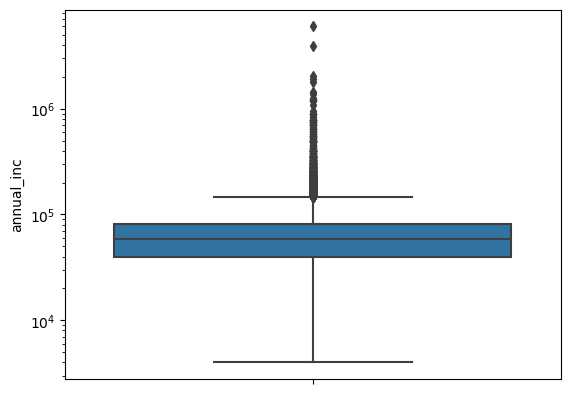

In [243]:
facet=sns.boxplot(data=loan_df, y='annual_inc')
facet.set_yscale('log')

In [240]:
loan_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Handling Outliers


<Axes: >

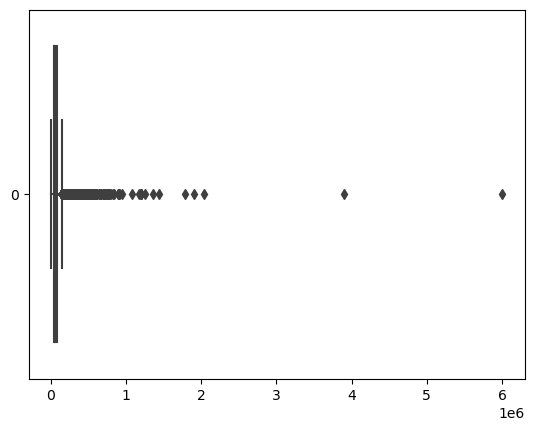

In [362]:
# "annual_inc"
sns.boxplot(loan_df['annual_inc'], orient="h")

In [364]:
loan_df['annual_inc'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [365]:
#Remove the outliers by considering the threshold as 0.95, because values after 95 percentile seems to be disconnected from the general distribution.
loan_df = loan_df[loan_df['annual_inc'] <= loan_df['annual_inc'].quantile(0.95)]

Text(0.5, 1.0, 'Box Plot of DTI')

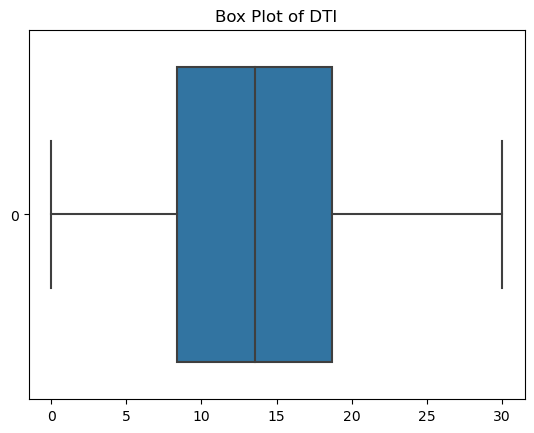

In [366]:
# Analysing other numerical variables "dti", "loan_amnt", "funded_amnt_inv"
#"dti"
sns.boxplot(loan_df.dti,orient="h")
plt.title("Box Plot of DTI")

Text(0.5, 1.0, 'Box Plot of Loan Amount')

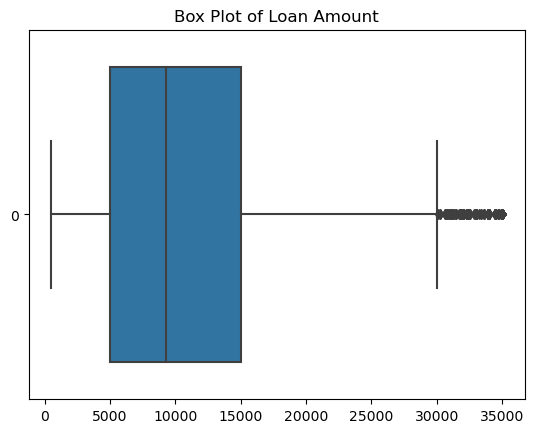

In [367]:
#"loan_amnt"
sns.boxplot(loan_df.loan_amnt,orient="h")
plt.title("Box Plot of Loan Amount")

In [369]:
loan_df['loan_amnt'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
5%        2250.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
96%      25000.000000
97%      25475.000000
98%      30000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0.5, 1.0, 'Box Plot of funded_amnt')

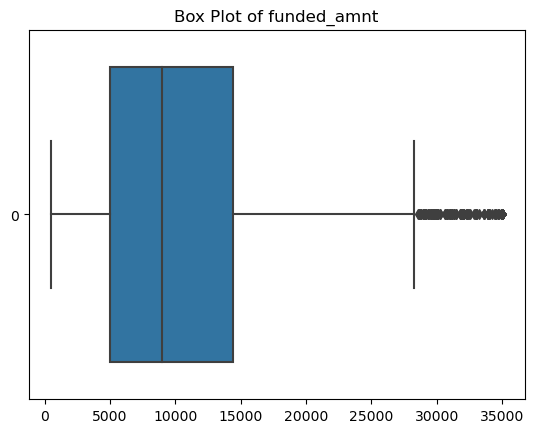

In [371]:
#"funded_amnt_inv"
sns.boxplot(loan_df.funded_amnt,orient="h")
plt.title("Box Plot of funded_amnt")

In [373]:
loan_df['funded_amnt'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
5%        2200.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
95%      25000.000000
96%      25000.000000
97%      25000.000000
98%      28100.000000
99%      34000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [374]:
#Though the distribution seems to be continuous, there are some values far from distribution of funded amount, we can remove those by considering the threshold as 0.98
loan_df = loan_df[loan_df['loan_amnt'] <= loan_df['loan_amnt'].quantile(0.98)]

In [375]:
loan_df.shape

(36115, 50)

# Bivariate Analysis

#### The intent here is to look at 2 variables and whether they influence the repayment.

Text(0, 0.5, 'Percentage of Total')

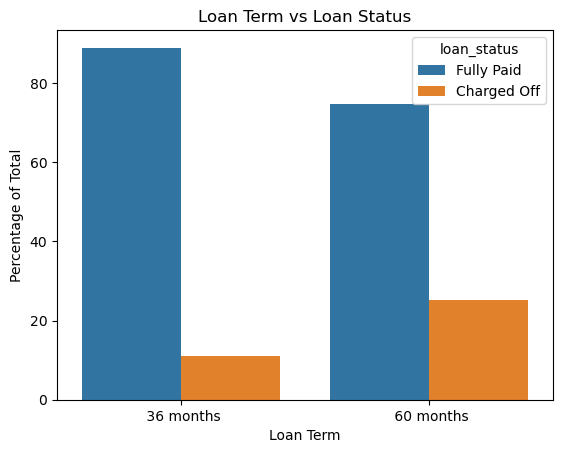

In [22]:
another_df = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
another_df['proportion'] = another_df.groupby('term').transform(lambda x: x/x.sum()*100)
sns.barplot(x='term', y='proportion', hue='loan_status', data=another_df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Loan Term vs Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Percentage of Total')


### Observation

The analysis shows that higher the loan term, the higher the chance of default

## How does interest rate and annual income impact defaults

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

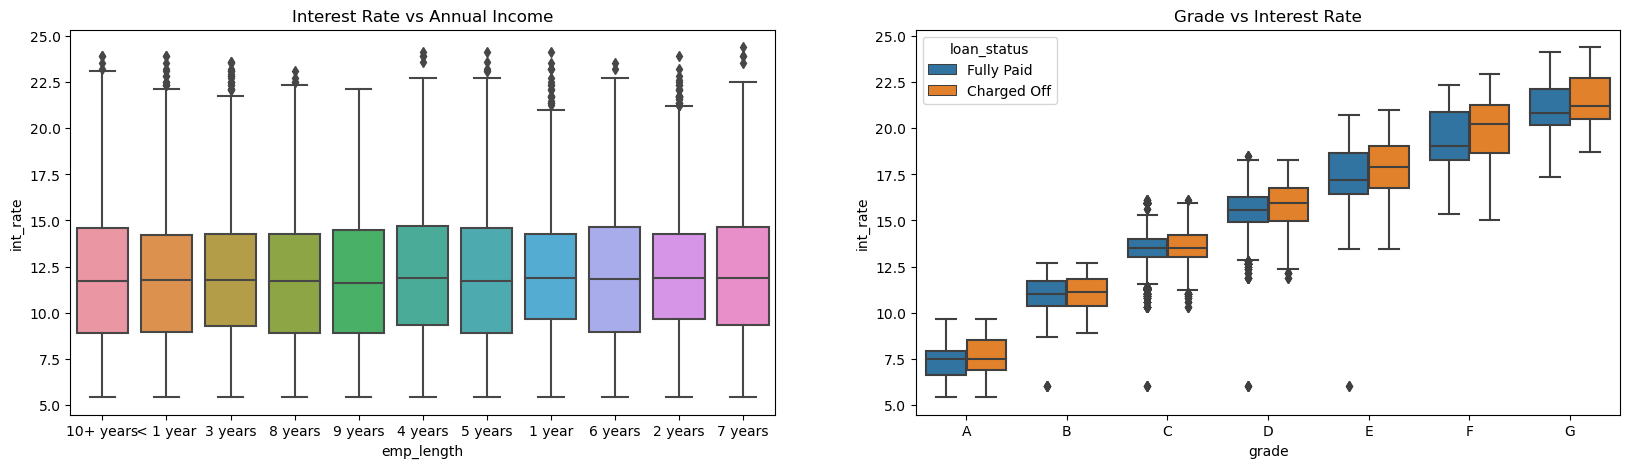

In [137]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='int_rate', data=loan_df)
plt.title('Interest Rate vs Annual Income')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.int_rate, hue='loan_status', order = grade_ord, data=loan_df)

In [386]:
loan_df['annual_income_groups'].value_counts()

50k-100k     18286
0-50k        15744
100k-150k     4136
150k-200k      965
200-250k       284
>300k          175
250k-300k      127
Name: annual_income_groups, dtype: int64

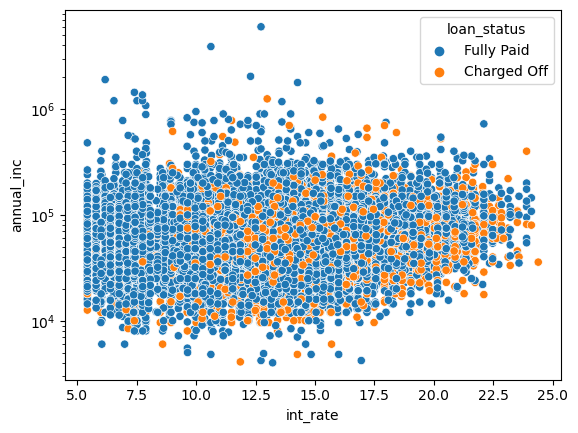

In [414]:
graph = sns.scatterplot(x='int_rate', y='annual_inc', hue='loan_status', data=loan_df)
plt.yscale('log')

## Observation

__The median interest rate for charged off loans is higher for Grades D, E & F__
<br>
If the loan is given to a grade D, E or F category borrower, there is a higher chance of delinquency.

In [147]:
#default_totals = loan_df.groupby(['term','grade','loan_status'])['id'].count().reset_index()
# default_totals['ratios'] = default_totals.groupby(['term','grade']).transform(lambda x: x/x.sum()*100)
pivot_df = loan_df.pivot_table(index=['grade', 'term'], columns='loan_status', aggfunc='size', fill_value=0)
pivot_df['proportion_paid'] = pivot_df['Fully Paid'] / (pivot_df['Charged Off'])

# Reset the index to make 'grade' and 'term' regular columns
result_df = pivot_df.reset_index()
result_df

loan_status,grade,term,Charged Off,Fully Paid,proportion_paid
0,A,36 months,565,9085,16.079646
1,A,60 months,37,358,9.675676
2,B,36 months,985,8346,8.473096
3,B,60 months,440,1904,4.327273
4,C,36 months,844,4905,5.811611
5,C,60 months,503,1582,3.145129
6,D,36 months,580,2651,4.570690
7,D,60 months,538,1316,2.446097
8,E,36 months,176,692,3.931818
9,E,60 months,539,1256,2.330241


<Axes: title={'center': 'Grade vs Loan Term'}, xlabel='term', ylabel='grade'>

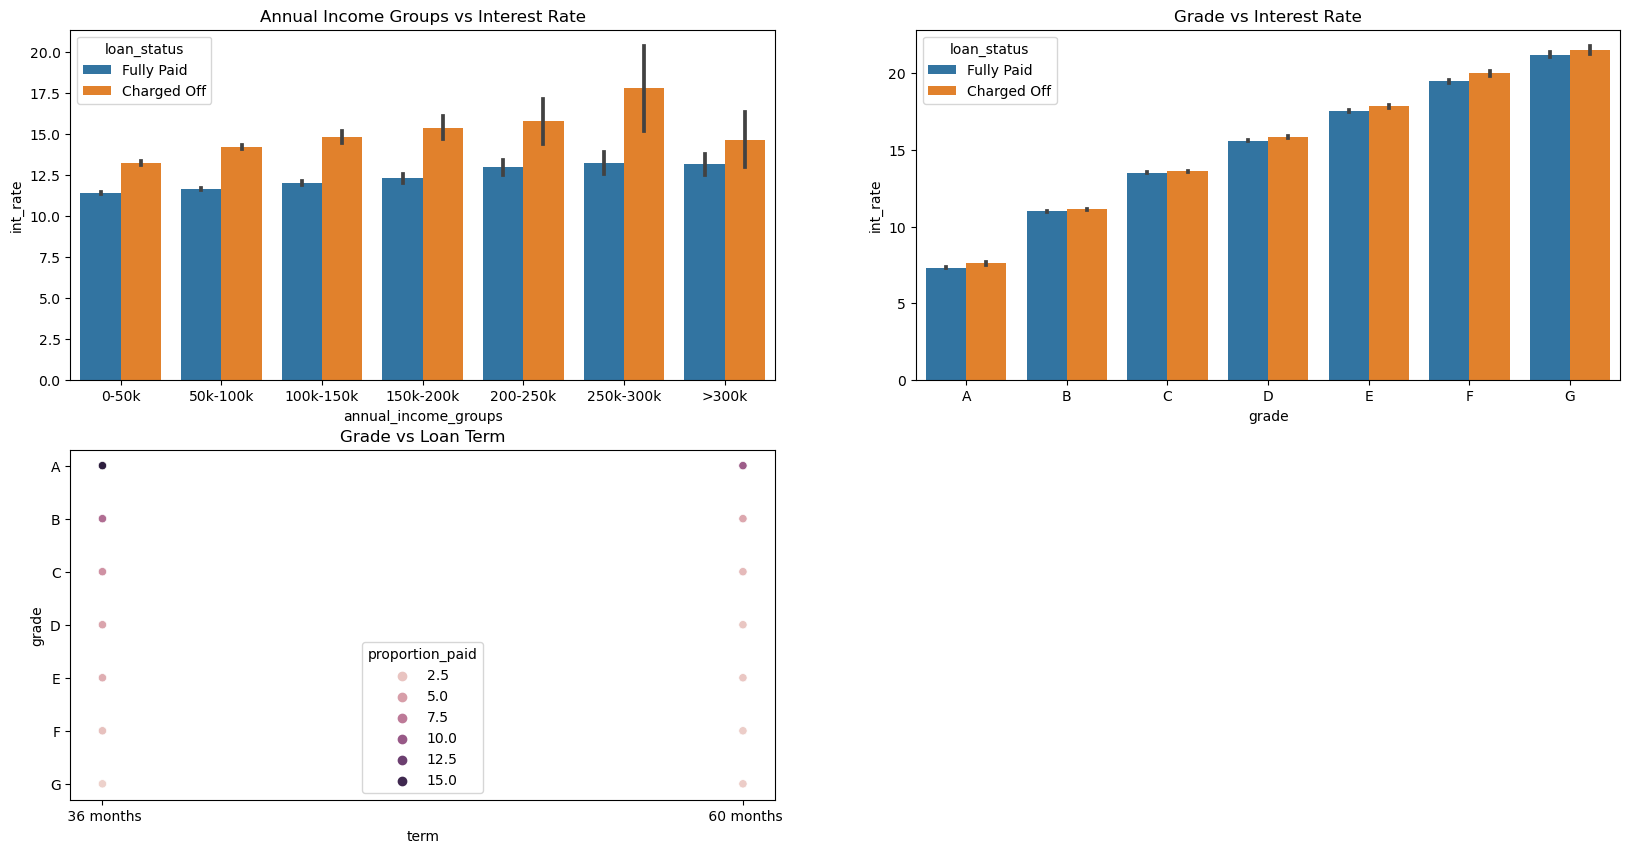

In [415]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(x='annual_income_groups', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Annual Income Groups vs Interest Rate')

plt.subplot(222)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.barplot(x='grade', y=loan_df.int_rate, order = grade_ord, hue='loan_status', data=loan_df)

plt.subplot(223)
plt.title('Grade vs Loan Term')
grade_ord = loan_df.grade.unique()
grade_ord.sort()

# Create a scatter plot
sns.scatterplot(x='term', y='grade', hue='proportion_paid', data=result_df)



##  Interest Rate vs Amount

<Figure size 2000x500 with 0 Axes>

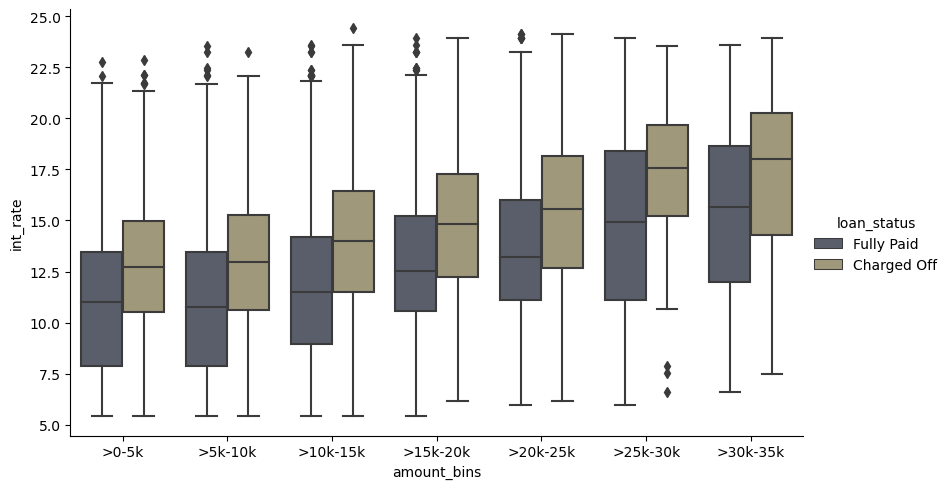

In [353]:
# We are going to analyze whether there is any relation between amounts, interest rate and the loan status
plt.figure(figsize=(20,5))
g = sns.catplot(data =loan_df,y ='int_rate', x ='amount_bins', hue ='loan_status', palette="cividis", kind = 'box', aspect=1.66)
plt.show()

### Grade vs Amount
Is there a relation between grade and amount?


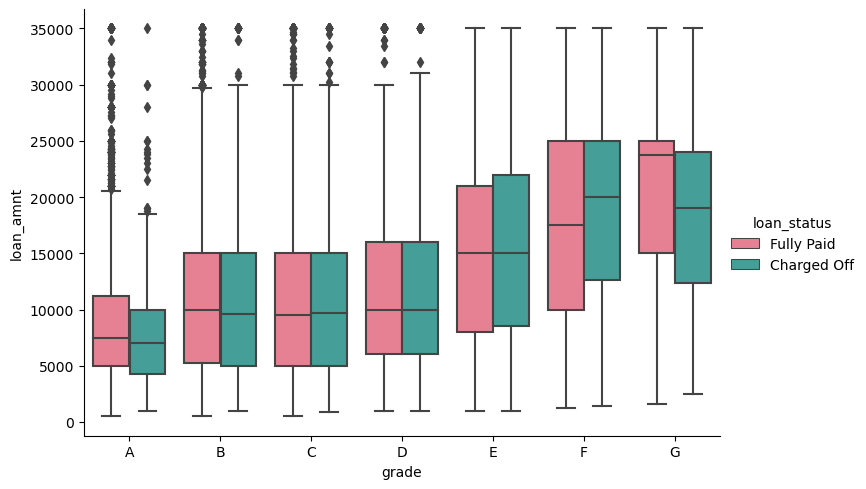

In [481]:
sns.catplot(data=loan_df,y ='loan_amnt', x ='grade', hue ='loan_status', order=grade_ord, palette="husl",kind = 'box', aspect=1.5)
plt.show()

### Grade vs Interest Rate
How does delinquency vary by interest rate for each grade?


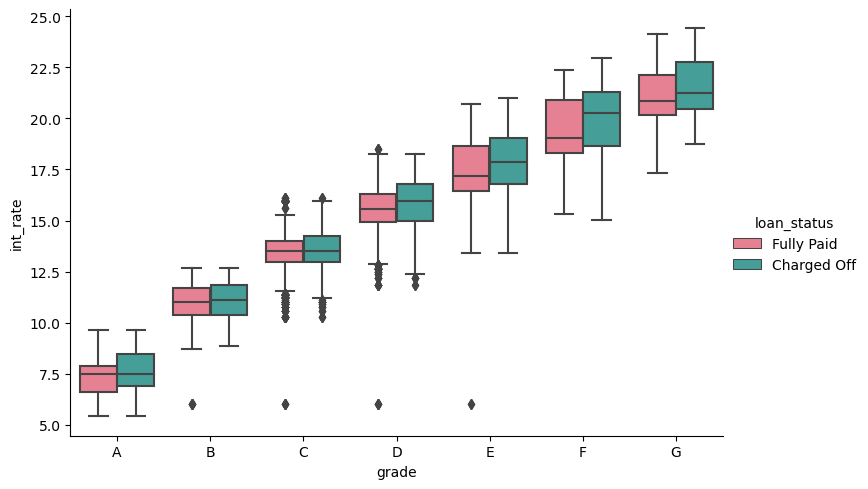

In [480]:
sns.catplot(data=loan_df,y ='int_rate', x ='grade', hue ='loan_status', order=grade_ord, palette="husl",kind = 'box', aspect=1.5)
plt.show()

## Observation

As grade decreases (A being best grade & G being poor), you see a significant difference in median interest rates between 'Charged Off' loans vs 'Fully Paid' loans

### Grade vs default


Text(0, 0.5, 'Paid/Default Percentage')

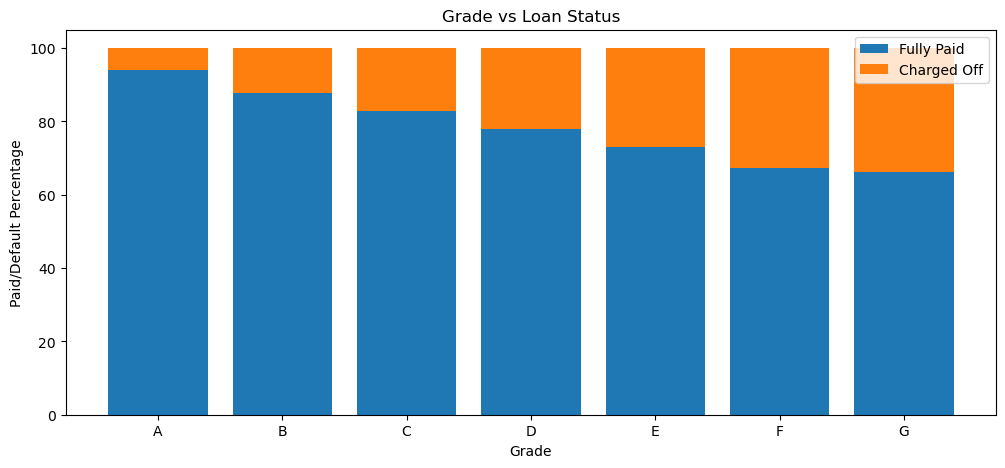

In [478]:
df = loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum()*100)
df
criteria = df['loan_status'] == 'Charged Off'

plt.figure(figsize=(12,5))
plt.bar(x=['A','B','C','D','E','F','G'], height=df[df['loan_status'] == 'Fully Paid']['percentage'], label='Fully Paid')
plt.bar(x=['A','B','C','D','E','F','G'], bottom=df[df['loan_status'] == 'Fully Paid']['percentage'],height=df[df['loan_status'] == 'Charged Off']['percentage'], label='Charged Off')
plt.legend()
plt.title('Grade vs Loan Status')
plt.xlabel('Grade')
plt.ylabel('Paid/Default Percentage')
##sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
#plt.title('Grade vs Loan status')

## Correlation Between Features

__Is there a correlation between features__

Let us plot a correlation matrix between features in this data set.

<Axes: >

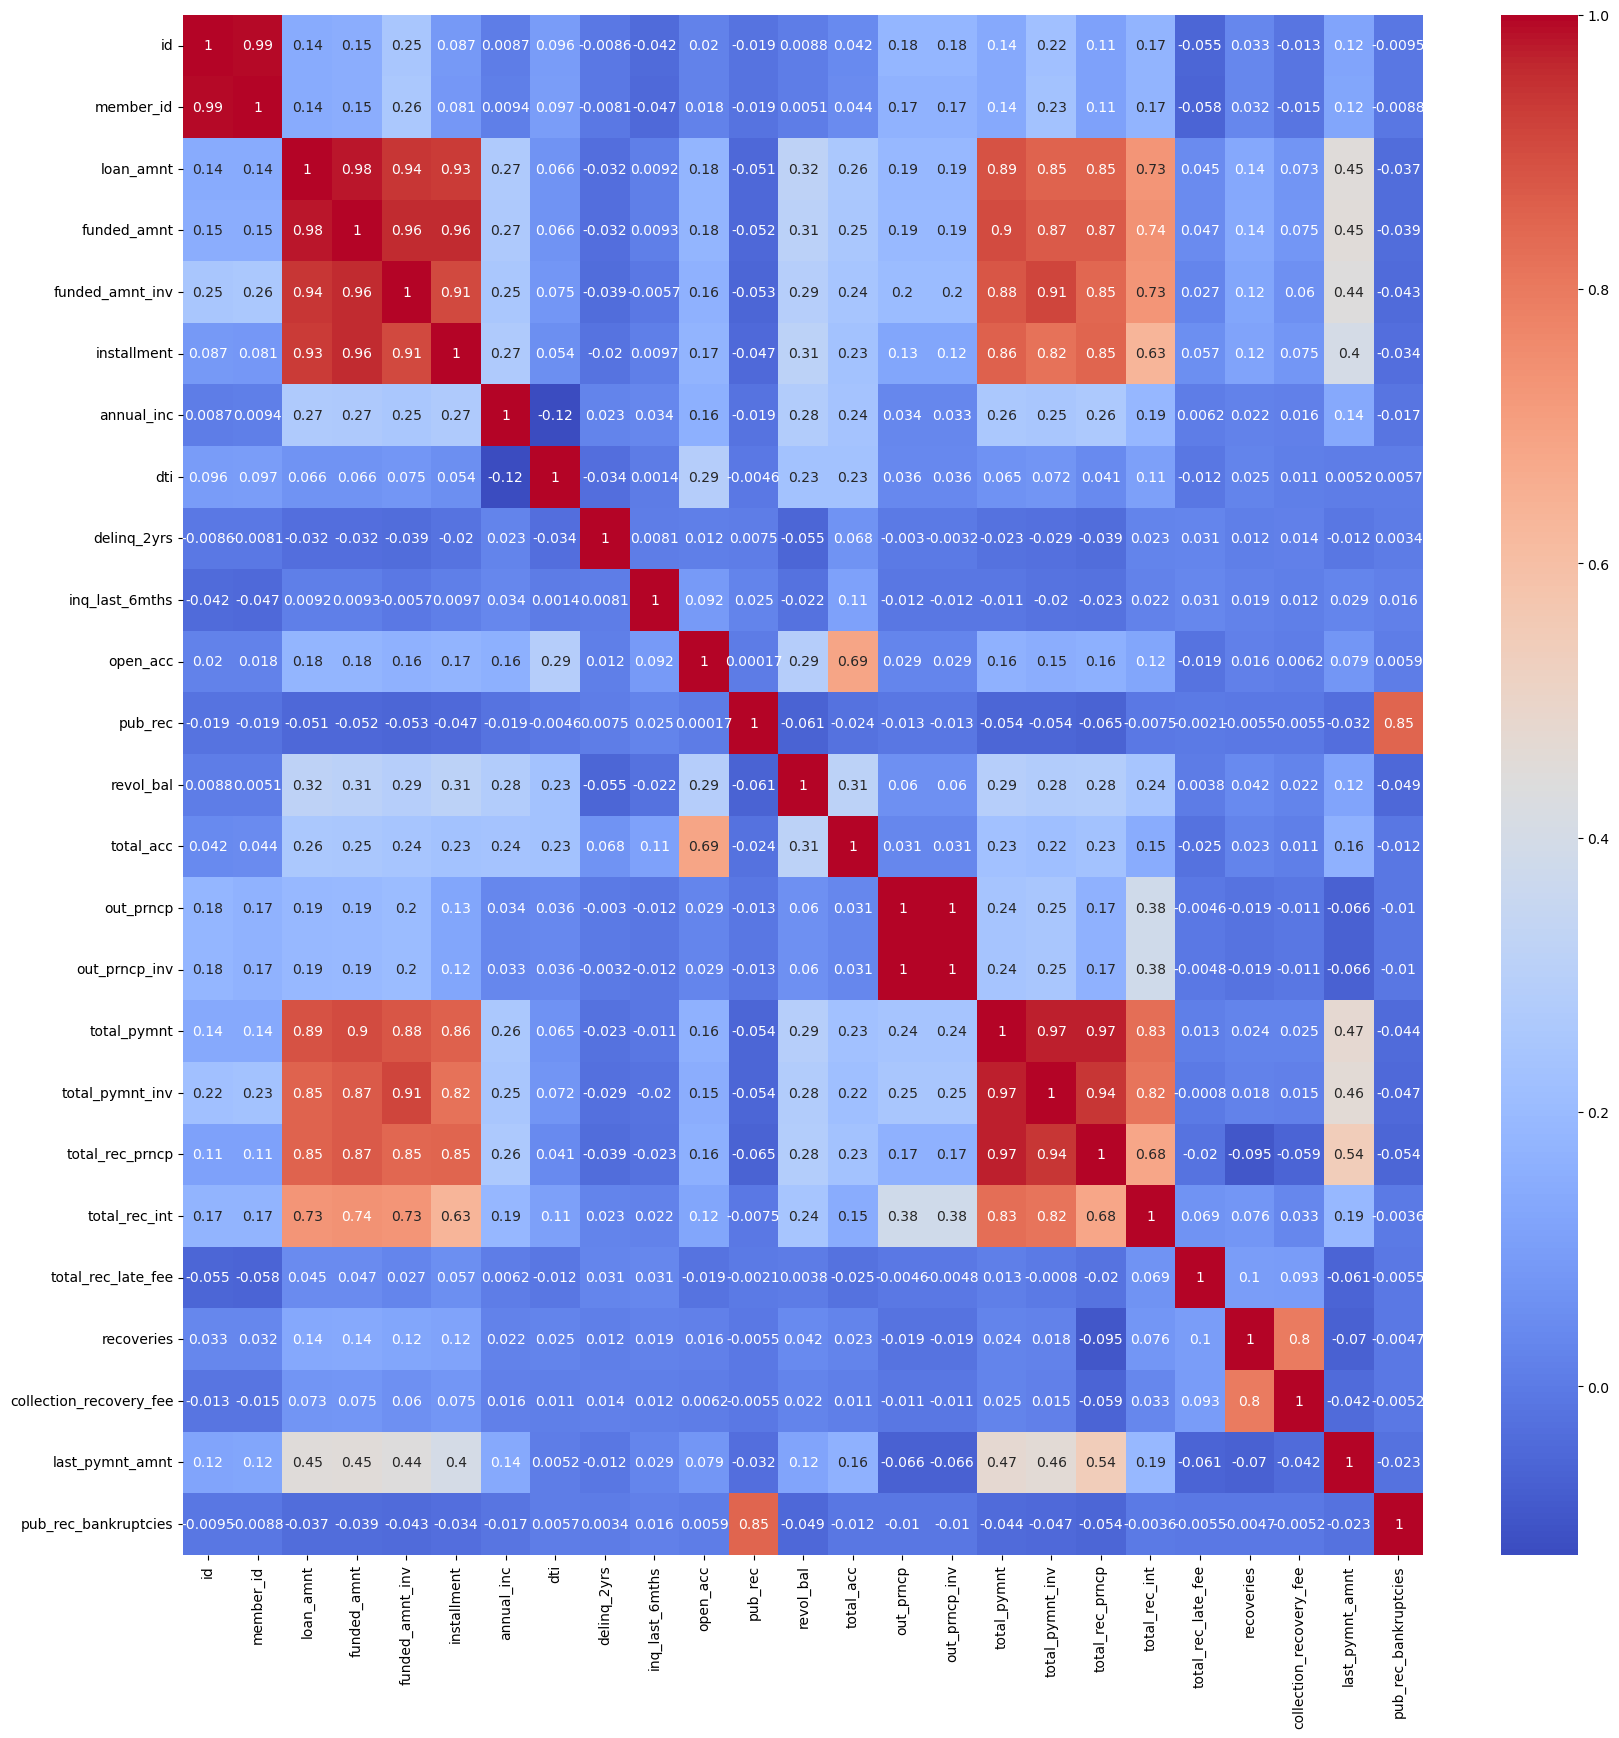

In [331]:
correlation_matrix=loan_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<Figure size 2500x2500 with 0 Axes>

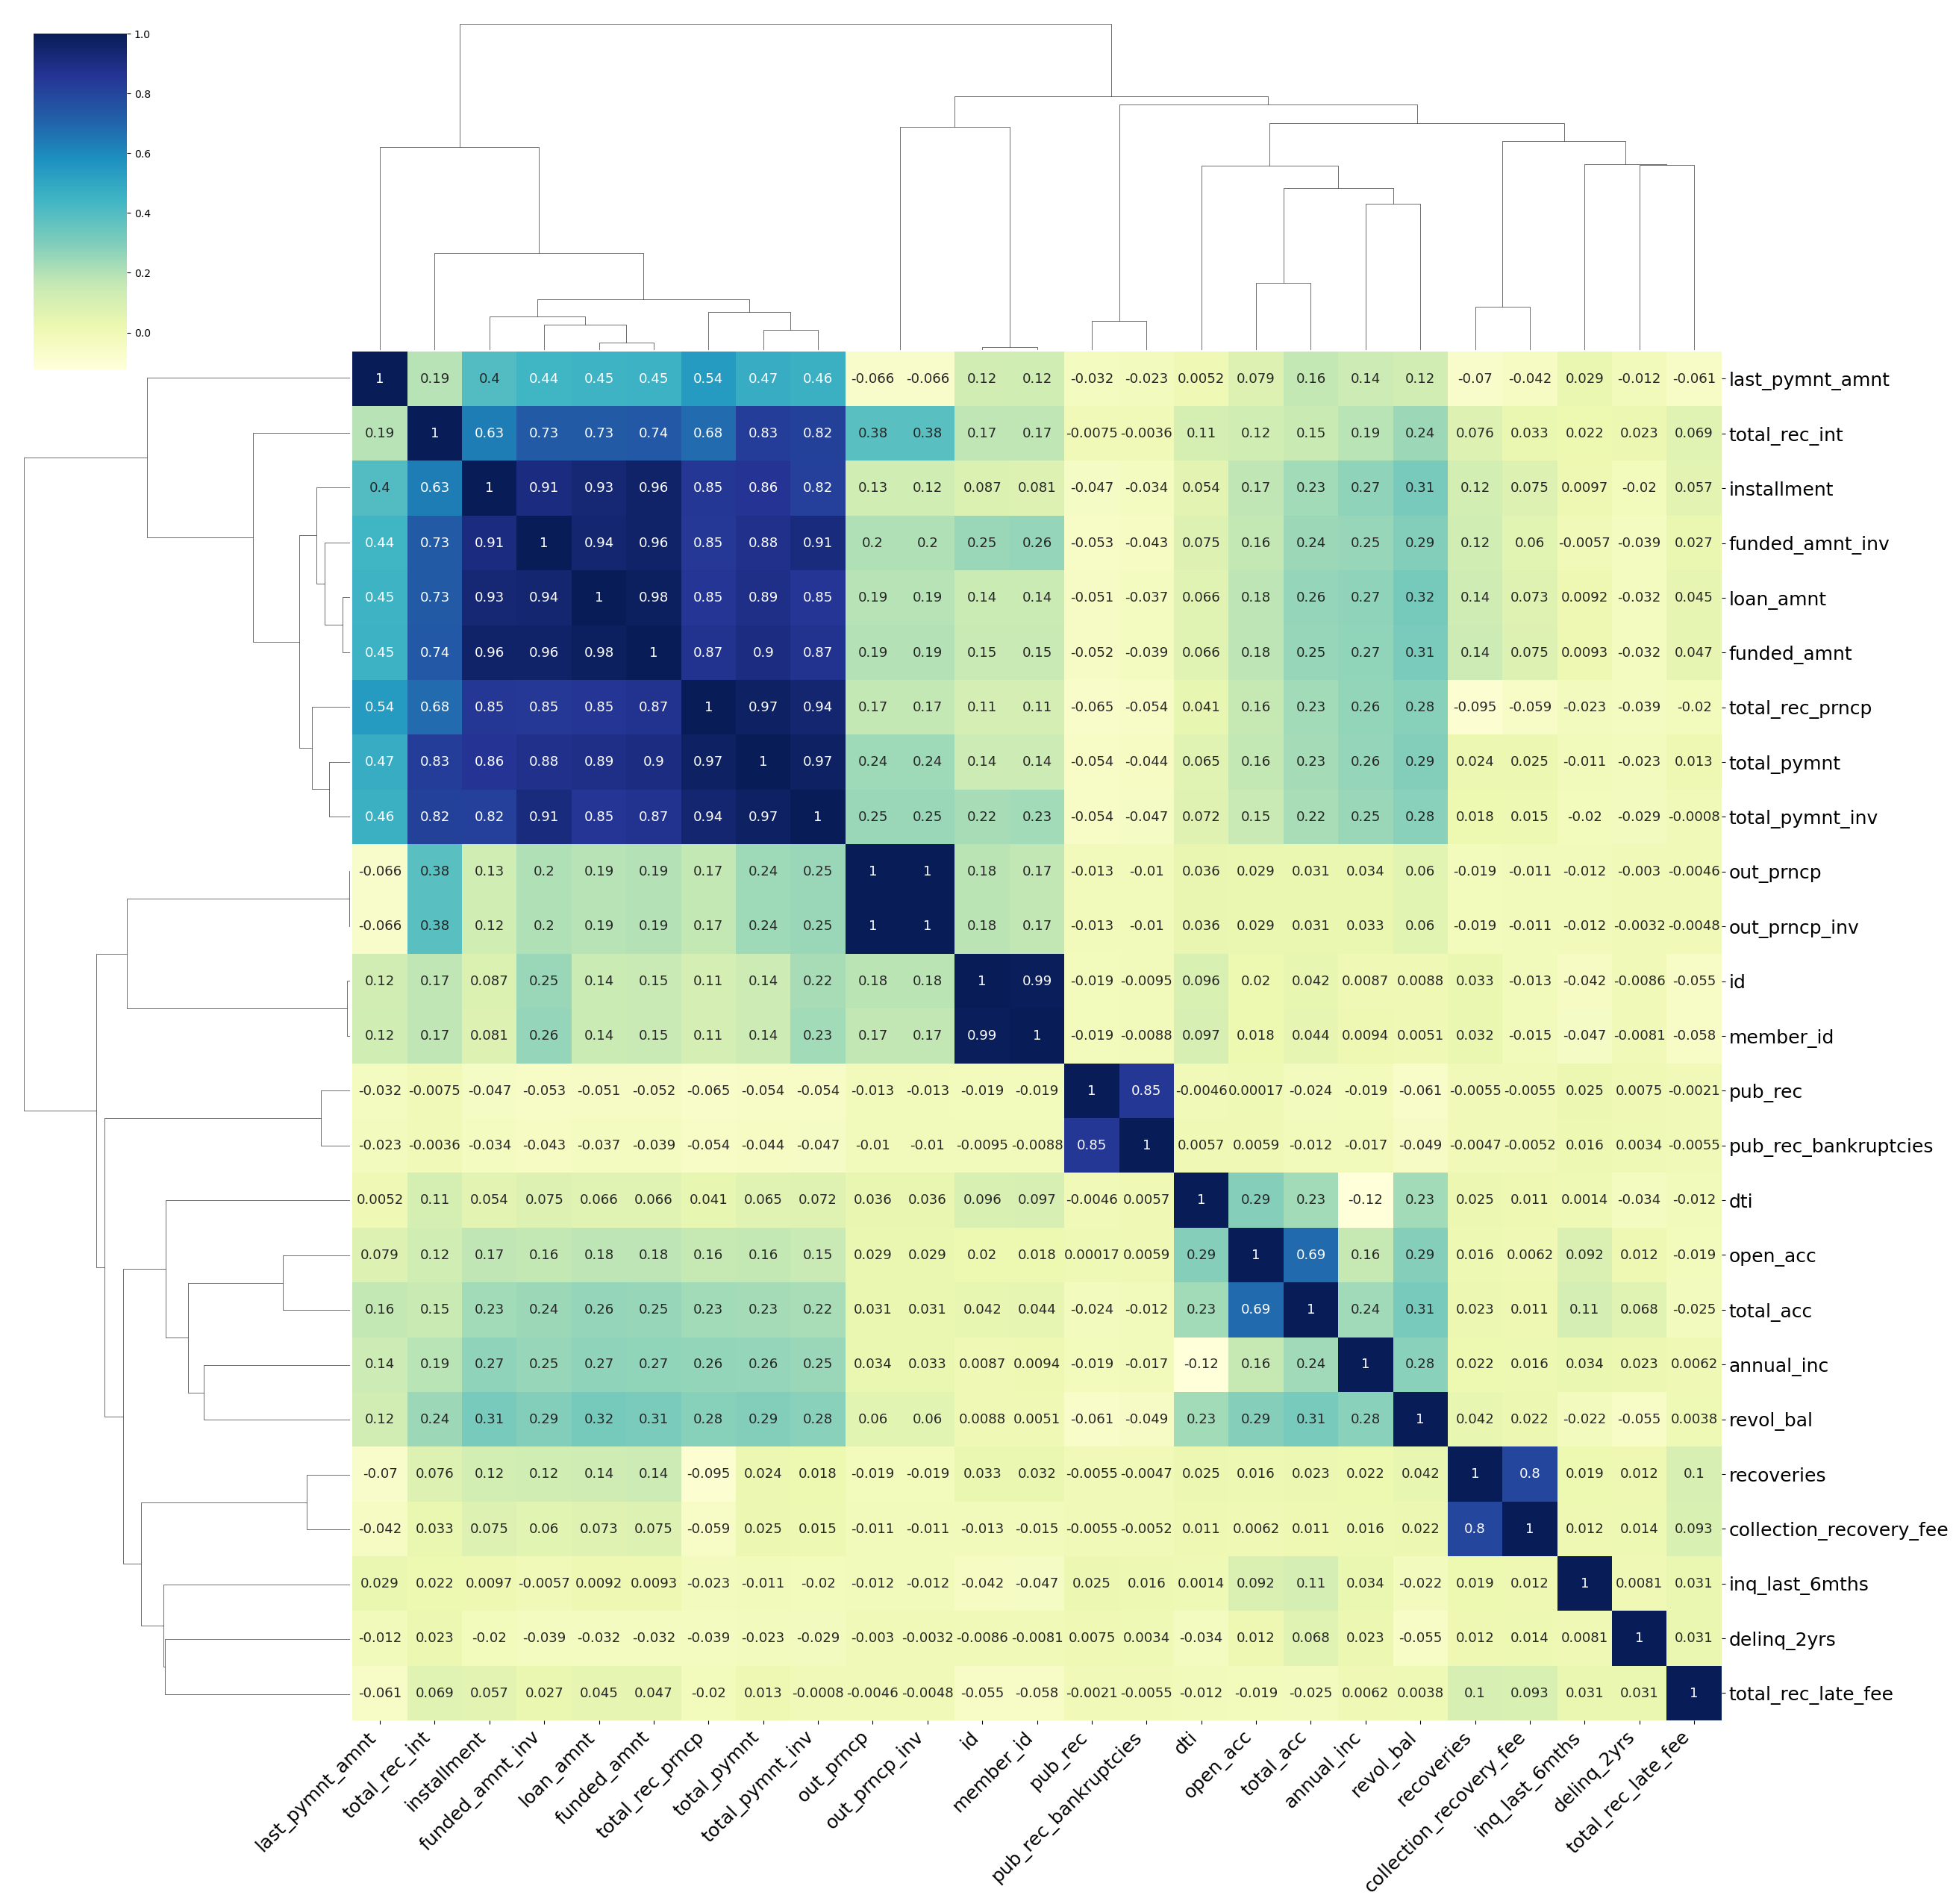

In [330]:
# Create a corrlation matrix with heat map before we do any other computations

correlation_matrix=loan_df.corr()
plt.figure(figsize=(25,25))
g = sns.clustermap(correlation_matrix, annot=True, cmap='YlGnBu', cbar_kws={'shrink': 1.0}, figsize=(25,25), annot_kws={'fontsize': 13})
# Adjust the size of the cluster map's axes
g.ax_heatmap.set_aspect('equal')  # Set aspect ratio to equal

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=18)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=18)

#g.ax_col_dendrogram.set_visible(False)  # Hide the column dendrogram
#g.ax_row_dendrogram.set_visible(False)  # Hide the row dendrogram

plt.show()

### Income Groups vs Defaults

In [483]:
income_group_default_df = loan_df.pivot_table(index=['annual_income_groups'], columns='loan_status', aggfunc='size', fill_value=0)
income_group_default_df['percentage'] = income_group_default_df['Charged Off'] / (income_group_default_df['Fully Paid'] + income_group_default_df['Charged Off']) *100
income_group_default_df = income_group_default_df.reset_index()
income_group_default_df


loan_status,annual_income_groups,Charged Off,Fully Paid,percentage
0,0-50k,2613,12776,16.979661
1,50k-100k,2422,15285,13.678206
2,100k-150k,429,3566,10.738423
3,150k-200k,103,813,11.244541
4,200-250k,29,248,10.469314
5,250k-300k,10,112,8.196721
6,>300k,21,150,12.280702


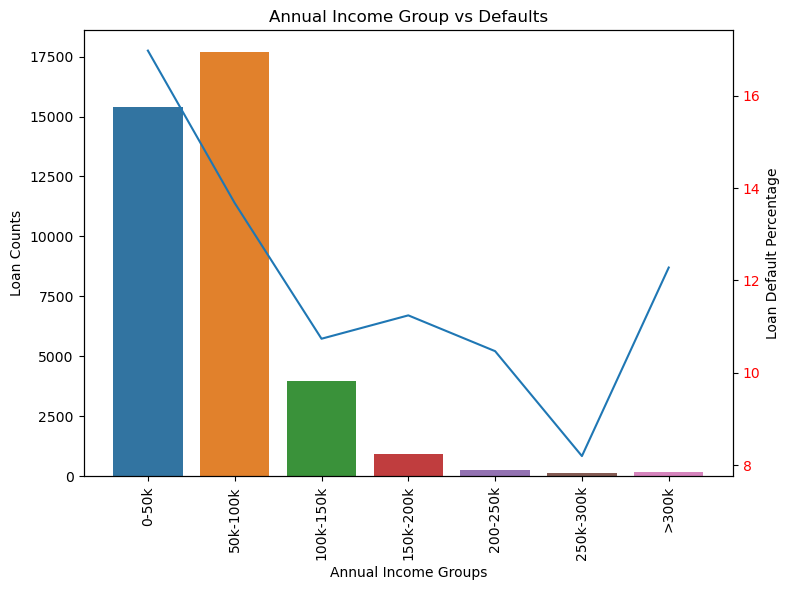

In [488]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)

sns.countplot(x='annual_income_groups', data=loan_df, ax=ax1)
ax1.set_ylabel('Loan Counts')
ax1.set_xlabel('Annual Income Groups')
ax1.set_title('Annual Income Group vs Defaults')
ax2 = ax1.twinx()

sns.lineplot(x='annual_income_groups', y='percentage',data=income_group_default_df, ax=ax2)

ax2.tick_params(axis='y', labelcolor='r')
# plt.title('Purpose vs Loan Counts')
plt.xlabel('Purpose')
plt.ylabel('Loan Default Percentage')


# Adjust layout
plt.tight_layout()

plt.show()

## Is there a specific purpose where we see defaults

__Analysing purpose & corresponding defaults will help__

Let us visualize the purpose and their default rates



In [454]:
purpose_df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
purpose_df['percentage'] = purpose_df.groupby('purpose').transform(lambda x: x/x.sum()*100)
purpose_df = purpose_df[purpose_df.loan_status == 'Charged Off']
purpose_df

,purpose,loan_status,id,percentage
0,car,Charged Off,160,10.673783
2,credit_card,Charged Off,542,10.781778
4,debt_consolidation,Charged Off,2767,15.325395
6,educational,Charged Off,56,17.230769
8,home_improvement,Charged Off,347,12.069565
10,house,Charged Off,59,16.076294
12,major_purchase,Charged Off,222,10.325581
14,medical,Charged Off,106,15.565345
16,moving,Charged Off,92,15.972222
18,other,Charged Off,633,16.377749


Text(0, 0.5, 'Percentage of Default')

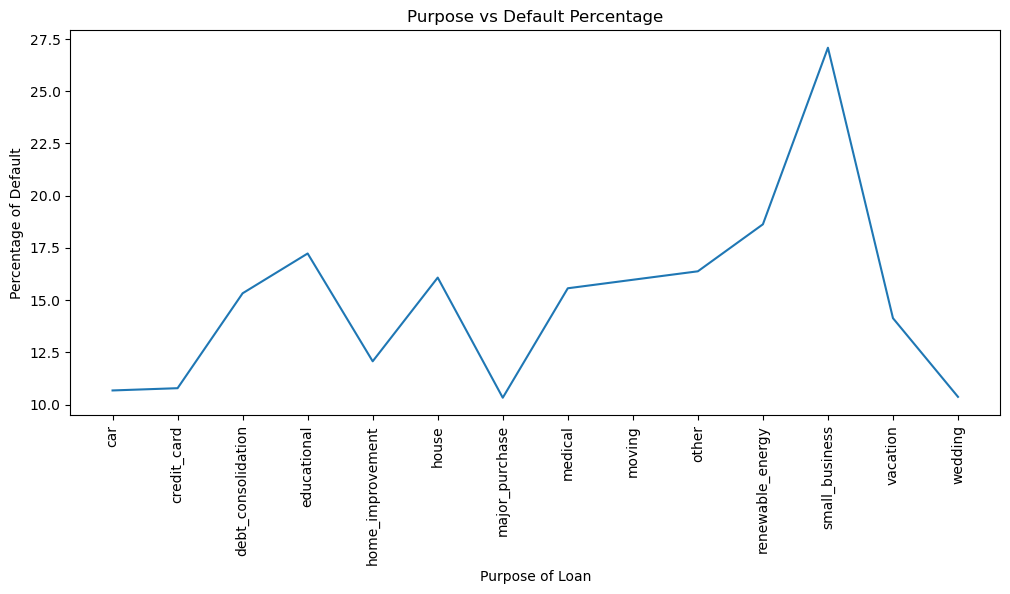

In [145]:
plt.figure(figsize=(12,5))
sns.lineplot(x='purpose', y='percentage', data=purpose_df)
plt.xticks(rotation=90)
plt.title('Purpose vs Default Percentage')
plt.xlabel('Purpose of Loan')
plt.ylabel('Percentage of Default')

In [452]:
purpose_grade_df = loan_df.pivot_table(index=['purpose', 'grade'], columns='loan_status', aggfunc='size', fill_value=0)
purpose_grade_df['percentage'] = purpose_grade_df['Charged Off'] / (purpose_grade_df['Fully Paid'] + purpose_grade_df['Charged Off']) *100
purpose_grade_df = purpose_grade_df.reset_index()


bins = [0, 5, 15, 25, float('inf')]
labels = ['Mild', 'Moderate', 'Elevated', 'Severe']
purpose_grade_df['risk_category'] = pd.cut(purpose_grade_df['percentage'], bins=bins, labels=labels)

purpose_grade_df

loan_status,purpose,grade,Charged Off,Fully Paid,percentage,risk_category
0,car,A,32,573,5.289256,Moderate
1,car,B,55,413,11.752137,Moderate
2,car,C,36,200,15.254237,Elevated
3,car,D,25,99,20.161290,Elevated
4,car,E,7,47,12.962963,Moderate
5,car,F,4,6,40.000000,Severe
6,car,G,1,1,50.000000,Severe
7,credit_card,A,63,1333,4.512894,Mild
8,credit_card,B,150,1481,9.196812,Moderate
9,credit_card,C,143,900,13.710451,Moderate


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

<Figure size 1000x500 with 0 Axes>

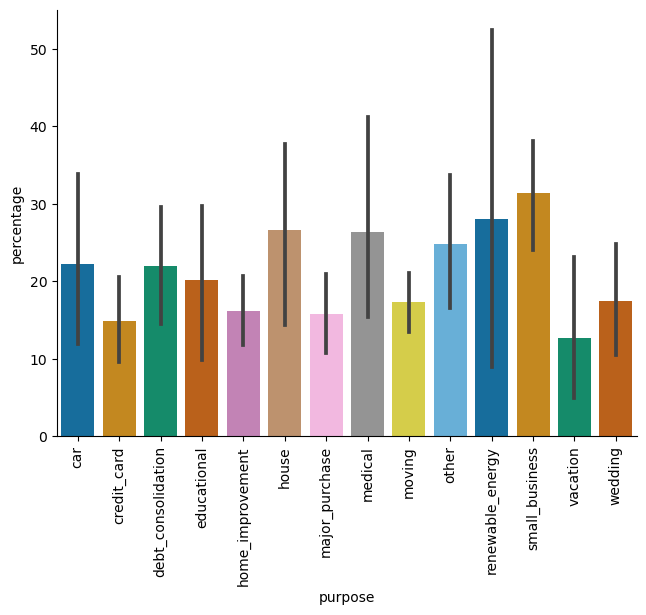

In [432]:
plt.figure(figsize=(10,5))
# Create a scatter plot
sns.catplot(x='purpose', y='percentage', palette='colorblind',data=purpose_grade_df, kind="bar", height=5, aspect=1.33,)
plt.xticks(rotation=90)
#plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
#plt.title('Purpose vs Default Percentage')
#plt.xlabel('Purpose of Loan')
#plt.ylabel('Grade')

## Observation

__Small Businesses represent the highest risk across the loan purposes__



## Grade vs Income


Text(37.75264626213187, 0.5, 'Annual Income')

<Figure size 1200x500 with 0 Axes>

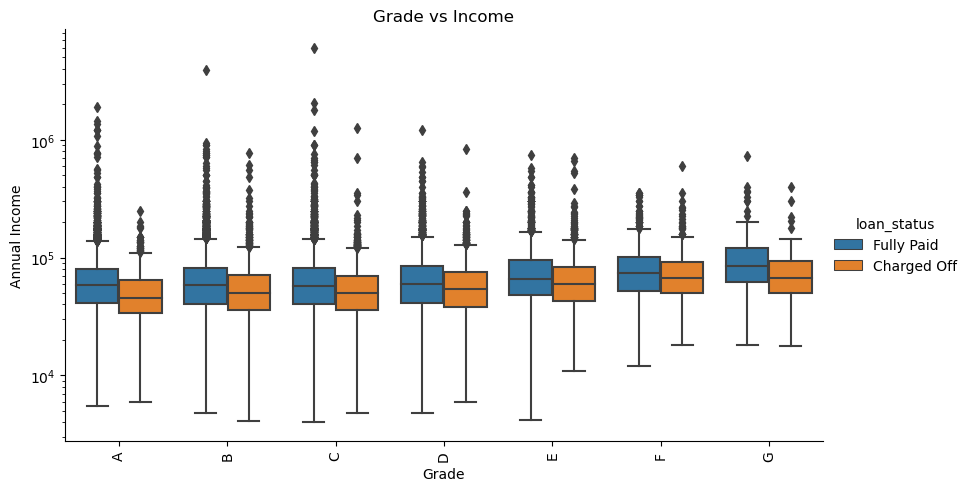

In [221]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='grade', y='annual_inc', order=grade_ord, hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Grade vs Income')
plt.xlabel('Grade')
plt.ylabel('Annual Income')

Text(37.75264626213187, 0.5, 'Annual Income')

<Figure size 1200x500 with 0 Axes>

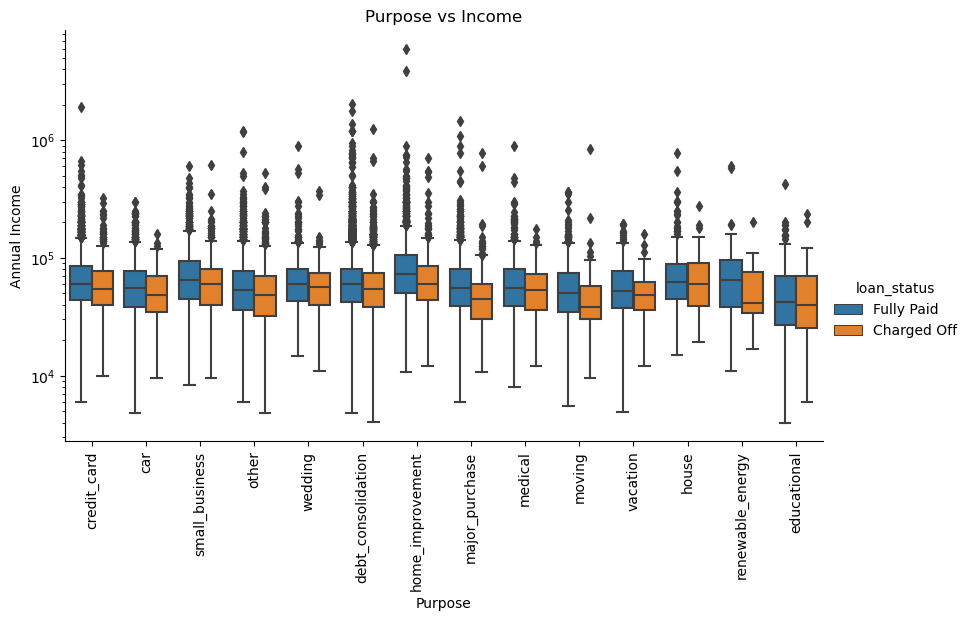

In [223]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='purpose', y='annual_inc', hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Purpose vs Income')
plt.xlabel('Purpose')
plt.ylabel('Annual Income')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

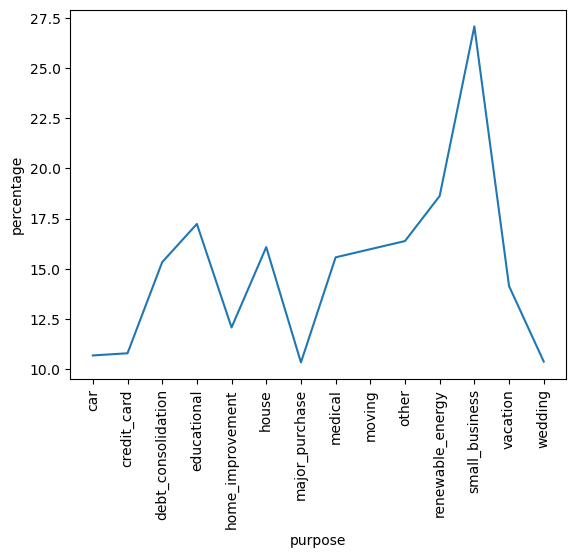

In [455]:
sns.lineplot(x='purpose', y='percentage', data=purpose_df)
plt.xticks(rotation=90)



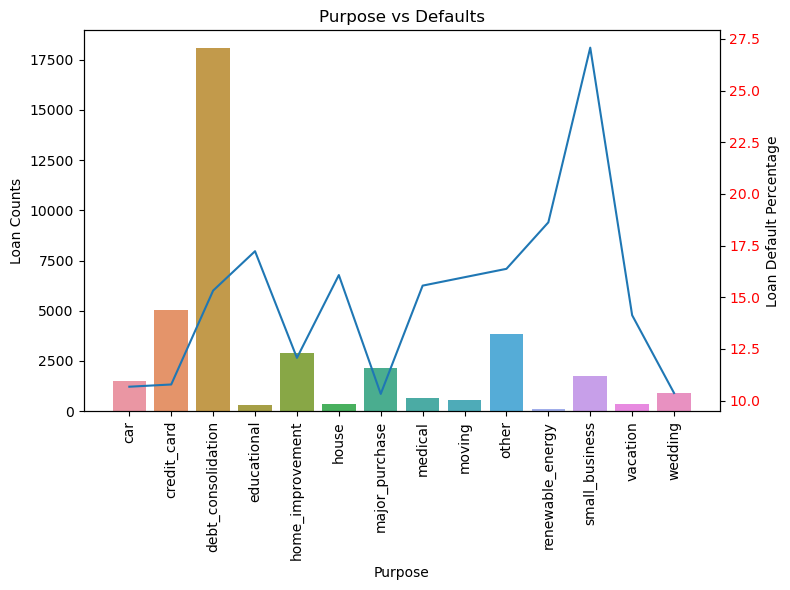

In [460]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)

sns.countplot(x='purpose', data=loan_df, order=sorted(loan_df['purpose'].unique()), ax=ax1)
ax1.set_ylabel('Loan Counts')
ax1.set_xlabel('Purpose')
ax1.set_title('Purpose vs Defaults')
ax2 = ax1.twinx()

sns.lineplot(x='purpose', y='percentage',data=purpose_df, ax=ax2)

ax2.tick_params(axis='y', labelcolor='r')
# plt.title('Purpose vs Loan Counts')
plt.xlabel('Purpose')
plt.ylabel('Loan Default Percentage')


# Adjust layout
plt.tight_layout()

plt.show()

Text(43.48931794887885, 0.5, 'Loan Amount')

<Figure size 1200x500 with 0 Axes>

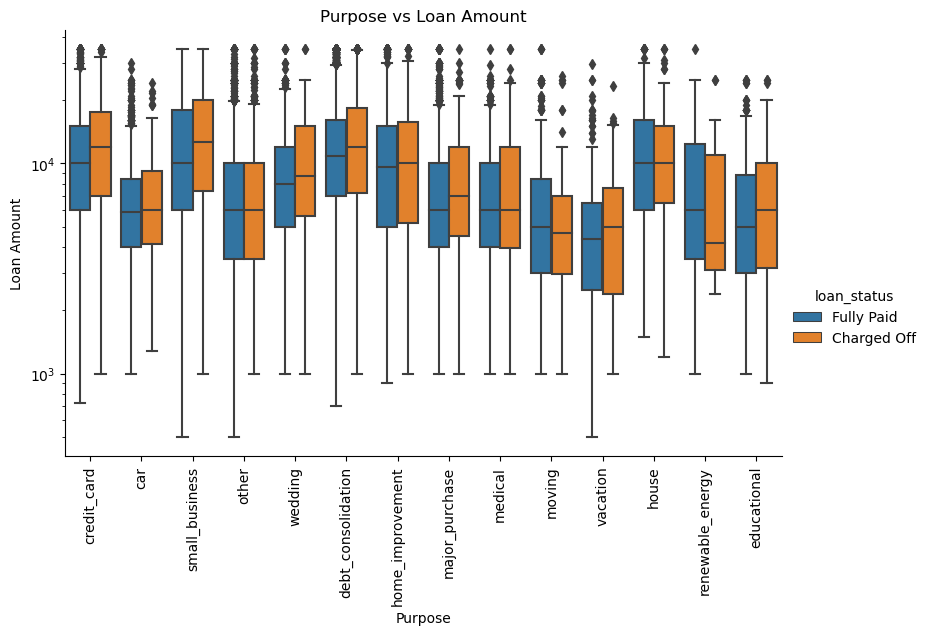

In [417]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')

## Income Groups vs Loan Amounts

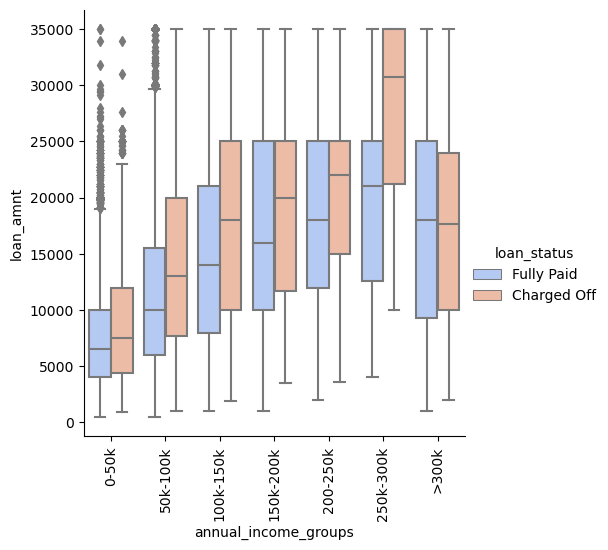

In [246]:
# We are going to analyze whether there is any relation between amounts, interest rate and the loan status
sns.catplot(data =loan_df,y ='loan_amnt', x ='annual_income_groups', hue ='loan_status',palette="coolwarm",kind = 'box')
plt.xticks(rotation=90)

plt.show()